In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [5]:
sys.path.append("dev/")
from dev.dustmap_handler import DustMap

In [6]:
import dustmaps.bayestar
from dustmaps.config import config
config['data_dir'] = '/Users/ratzenboe/Documents/programs/pythonProject/dustmap_data/'

In [3]:
import healpy as hp
import astropy.units as u
from astropy.coordinates import SkyCoord

# Define the number of pixels in the HEALPix map (NSIDE parameter)
nside = 512
npix = hp.nside2npix(nside)

# Get the coordinates of the center of each pixel in the HEALPix map
l, b = hp.pix2ang(nside, np.arange(npix), lonlat=True)
coords = SkyCoord(
    l*u.deg, b*u.deg,
    distance=1.2*u.kpc,
    frame='galactic'
)

In [4]:
map_fname_planck = '/Users/ratzenboe/Documents/programs/pythonProject/dustmap_data/planck/HFI_CompMap_ThermalDustModel_2048_R1.20.fits'
map_fname_edenhofer = '/Users/ratzenboe/Documents/programs/pythonProject/dustmap_data/edenhofer_2023/mean_and_std_healpix.fits'
map_fname_bayestar = '/Users/ratzenboe/Documents/programs/pythonProject/dustmap_data/bayestar/bayestar2019.h5'

# Download dustmaps

In [5]:
# import dustmaps.bayestar
# dustmaps.bayestar.fetch()

In [6]:
dm_plk = DustMap('planck', map_fname_planck)
dm_edh = DustMap('edenhofer', map_fname_edenhofer)
dm_bs = DustMap('bayestar', map_fname_bayestar, version='bayestar2019')

Integrating extinction map (this might take a couple of minutes)...
Optimizing map for querying (this might take a couple of seconds)...


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 22.247 s
  pix_info:   0.293 s
   samples:  11.773 s
      best:   2.433 s
       nan:   0.009 s
      sort:   7.682 s
       idx:   0.058 s


In [7]:
data_plk = dm_plk.transform({'skycoords': coords, 'Rv': 3.1})
data_edh = dm_edh.transform({'skycoords': coords})
data_bs = dm_bs.transform({'skycoords': coords})

In [8]:
np.percentile(data_plk['A_V'], 99.5)

27.790718421935143

# Compute differences

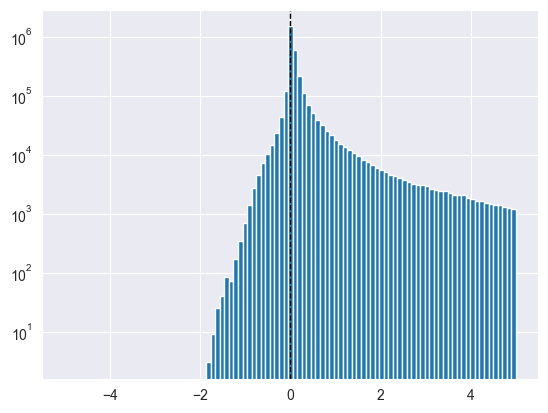

In [35]:
ref_dm = data_plk['A_V']
comparison_dm = data_edh['A_V']

diff = ref_dm - comparison_dm
plt.hist(diff, bins=np.linspace(-5, 5, 100), log=True)
plt.axvline(0, color='k', lw=1, ls='--')
plt.show()

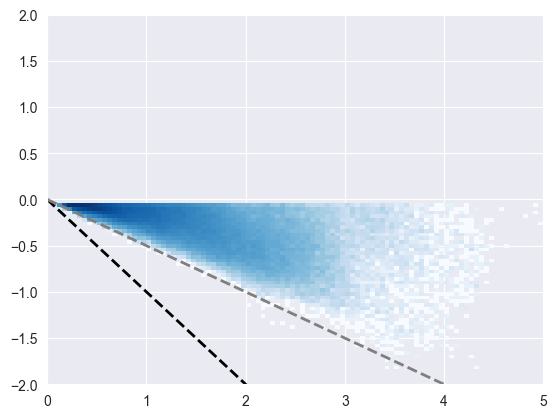

In [36]:
th = -0.05
err = diff < th
plt.hist2d(comparison_dm[err], diff[err], bins=100, range=((0, 5), (-2, 2)), cmap='Blues', norm='log')
# plt.scatter(data_edh['A_V'][err], diff[err], s=5, alpha=0.002)

# plot 1:1 line
x = np.linspace(0, 5, 100)
plt.plot(x, -x, color='k', lw=2, ls='--')
plt.plot(x, -x/2, color='tab:grey', lw=2, ls='--')

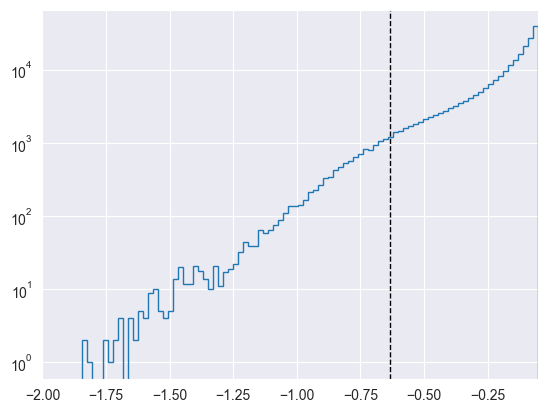

In [37]:
# plot cdf of diff
plt.hist(diff[err], bins=np.linspace(-2, th, 100), cumulative=False, density=False, histtype='step', lw=2, log=True)
plt.xlim(-2, th)
plt.axvline(np.percentile(diff[err], 5), color='k', lw=1, ls='--')

(-2.0, 0.01)

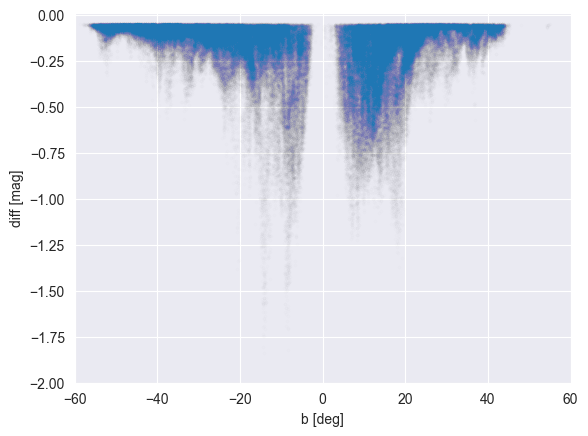

In [39]:
plt.scatter(b[err], diff[err], s=5, alpha=0.002)
# plt.axvline(10, color='k', lw=1, ls='--')
# plt.axvline(-10, color='k', lw=1, ls='--')
plt.xlabel('b [deg]')
plt.ylabel('diff [mag]')
plt.xlim(-60, 60)
plt.ylim(-2, 0.01)

(-2.0, 0.01)

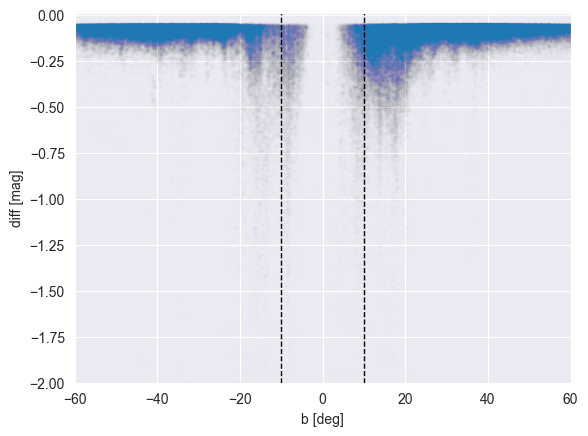

In [33]:
plt.scatter(b[err], diff[err], s=5, alpha=0.002)
plt.axvline(10, color='k', lw=1, ls='--')
plt.axvline(-10, color='k', lw=1, ls='--')
plt.xlabel('b [deg]')
plt.ylabel('diff [mag]')
plt.xlim(-60, 60)
plt.ylim(-2, 0.01)